In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)

## Read the Files

In [2]:
# read the eurostoxx data
df_euro=pd.read_csv("../data/2021-12-06_Top25 Euro Stoxx daily.csv")
df_euro.head()

C:\Users\Rahim\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,gvkey,iid,datadate,conm,curcdd,cshoc,cshtrd,prccd,prchd,prcld,prcstd,split,splitf,isin,conml,county,naics,sic
0,8546,01W,20100104,KONINKLIJKE PHILIPS NV,EUR,972411769.0,4154697.0,21.495,21.520,20.82,10.0,NaN,NaN,NL0000009538,Koninklijke Philips NV,NaN,334510,3845
1,8546,01W,20100105,KONINKLIJKE PHILIPS NV,EUR,972411769.0,4535550.0,21.450,21.685,21.30,10.0,NaN,NaN,NL0000009538,Koninklijke Philips NV,NaN,334510,3845
2,8546,01W,20100106,KONINKLIJKE PHILIPS NV,EUR,972411769.0,4496385.0,21.120,21.430,20.97,10.0,NaN,NaN,NL0000009538,Koninklijke Philips NV,NaN,334510,3845
3,8546,01W,20100107,KONINKLIJKE PHILIPS NV,EUR,972411769.0,4573449.0,21.000,21.200,20.78,10.0,NaN,NaN,NL0000009538,Koninklijke Philips NV,NaN,334510,3845
4,8546,01W,20100108,KONINKLIJKE PHILIPS NV,EUR,972411769.0,4204274.0,21.030,21.300,20.79,10.0,NaN,NaN,NL0000009538,Koninklijke Philips NV,NaN,334510,3845


In [3]:
# read the sp500 data
df_sp=pd.read_csv("../data/2021-12-06_Top25 SP500 daily.csv")
df_sp.head()

,gvkey,iid,datadate,tic,cusip,conm,div,divd,dvrated,divsppaydate,curcdd,cshoc,cshtrd,eps,prccd,prchd,prcld,prcod,prcstd,exchg,secstat,cik,conml,naics,sic,spcindcd,stko
0,1045,1,20100104,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,17441530.0,-4.98,7.72,7.79,7.45,7.73,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
1,1045,1,20100105,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,24044700.0,-4.98,8.36,8.42,7.68,7.68,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
2,1045,1,20100106,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,15770140.0,-4.98,8.11,8.31,8.01,8.11,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
3,1045,1,20100107,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,17663110.0,-4.98,8.25,8.50,8.05,8.05,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
4,1045,1,20100108,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,12413430.0,-4.98,8.11,8.42,7.97,8.34,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0


## First Insights (SP500)

In [4]:
df_sp.dtypes

gvkey             int64
iid               int64
datadate          int64
tic              object
cusip            object
conm             object
div             float64
divd            float64
dvrated         float64
divsppaydate    float64
curcdd           object
cshoc           float64
cshtrd          float64
eps             float64
prccd           float64
prchd           float64
prcld           float64
prcod           float64
prcstd          float64
exchg             int64
secstat          object
cik               int64
conml            object
naics             int64
sic               int64
spcindcd        float64
stko              int64
dtype: object

In [5]:
df_sp["datadate"] = pd.to_datetime(df_sp["datadate"].astype(str), format='%Y%m%d')

In [6]:
#timeframe
print("From ",df_sp["datadate"].min(), "  To", df_sp["datadate"].max()) 

From  2010-01-04 00:00:00   To 2021-12-03 00:00:00


In [7]:
# currrencies
df_sp["curcdd"].unique()

array(['USD', nan], dtype=object)

In [19]:
# unique Stock after name "conm"
df_sp["conm"].unique()

array(['AMERICAN AIRLINES GROUP INC', 'ABBOTT LABORATORIES',
       'ADVANCED MICRO DEVICES', 'AIR PRODUCTS & CHEMICALS INC',
       'ALASKA AIR GROUP INC', 'AMERICAN ELECTRIC POWER CO',
       'AMERICAN EXPRESS CO', 'AFLAC INC', 'AMERICAN INTERNATIONAL GROUP',
       'AMETEK INC', 'AMGEN INC', 'ANALOG DEVICES', 'APA CORP',
       'APPLE INC', 'APPLIED MATERIALS INC', 'ARCHER-DANIELS-MIDLAND CO',
       'AON PLC', 'ARTHUR J GALLAGHER & CO',
       'INTL BUSINESS MACHINES CORP', '3M CO', 'ALTRIA GROUP INC',
       'SMITH (A.O.)', 'AMEREN CORP', 'ALLIANT ENERGY CORP',
       'MICROSOFT CORP', 'ADOBE INC', 'ABIOMED INC', 'AMPHENOL CORP',
       'ABBVIE INC', 'ARISTA NETWORKS INC', 'AES CORP (THE)',
       'ALLSTATE CORP', 'ALBEMARLE CORP', 'AMERISOURCEBERGEN CORP',
       'ANSYS INC', 'AMAZON.COM INC', 'ALEXANDRIA R E EQUITIES INC',
       'AMCOR PLC', 'AMERICAN TOWER CORP', 'APTIV PLC',
       'AKAMAI TECHNOLOGIES INC', 'AGILENT TECHNOLOGIES INC',
       'ALIGN TECHNOLOGY INC', 'ACCENTUR

In [9]:
# unique Stock after name "conml"
df_sp["conml"].unique()

array(['American Airlines Group Inc', 'Abbott Laboratories',
       'Advanced Micro Devices Inc', 'Air Products and Chemicals Inc.',
       'Alaska Air Group Inc.', 'American Electric Power Co Inc',
       'American Express Co', 'AFLAC Inc',
       'American International Group Inc', 'AMETEK Inc', 'Amgen Inc',
       'Analog Devices Inc', 'APA Corporation', 'Apple Inc',
       'Applied Materials Inc', 'Archer-Daniels-Midland Co', 'Aon plc',
       'Arthur J. Gallagher & Co.',
       'International Business Machines Corp', '3M Co',
       'Altria Group Inc', 'A. O. Smith Corp', 'Ameren Corp',
       'Alliant Energy Corp', 'Microsoft Corp', 'Adobe Inc',
       'ABIOMED Inc', 'Amphenol Corp', 'AbbVie Inc',
       'Arista Networks Inc', 'AES Corp (The)', 'Allstate Corp (The)',
       'Albemarle Corp', 'AmerisourceBergen Corp', 'ANSYS Inc',
       'Amazon.com Inc', 'Alexandria Real Estate Equities Inc.',
       'Amcor Plc', 'American Tower Corp', 'Aptiv Plc',
       'Akamai Technologies Inc

In [42]:
df_sp

,gvkey,iid,datadate,tic,cusip,conm,div,divd,dvrated,divsppaydate,curcdd,cshoc,cshtrd,eps,prccd,prchd,prcld,prcod,prcstd,exchg,secstat,cik,conml,naics,sic,spcindcd,stko
0,1045,1,2010-01-04,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,17441530.0,-4.98,7.72,7.79,7.45,7.73,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
1,1045,1,2010-01-05,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,24044700.0,-4.98,8.36,8.42,7.68,7.68,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
2,1045,1,2010-01-06,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,15770140.0,-4.98,8.11,8.31,8.01,8.11,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
3,1045,1,2010-01-07,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,17663110.0,-4.98,8.25,8.50,8.05,8.05,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
4,1045,1,2010-01-08,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,12413430.0,-4.98,8.11,8.42,7.97,8.34,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176217,316056,1,2021-11-29,ALLE,G0176J109,ALLEGION PLC,NaN,NaN,NaN,NaN,USD,89696000.0,550280.0,5.13,128.68,131.82,128.62,131.17,3.0,11,A,1579241,Allegion Plc,332510,3420,NaN,0
176218,316056,1,2021-11-30,ALLE,G0176J109,ALLEGION PLC,NaN,NaN,NaN,NaN,USD,89696000.0,1415272.0,5.13,123.64,127.73,123.23,127.73,3.0,11,A,1579241,Allegion Plc,332510,3420,NaN,0
176219,316056,1,2021-12-01,ALLE,G0176J109,ALLEGION PLC,NaN,NaN,NaN,NaN,USD,89696000.0,756386.0,5.13,122.79,128.43,122.77,125.50,3.0,11,A,1579241,Allegion Plc,332510,3420,NaN,0
176220,316056,1,2021-12-02,ALLE,G0176J109,ALLEGION PLC,NaN,NaN,NaN,NaN,USD,89696000.0,900423.0,5.13,128.43,128.75,123.52,123.52,3.0,11,A,1579241,Allegion Plc,332510,3420,NaN,0


###  American Airlines Corp 

In [20]:
# price trend f closed daily or whole timeframe for american airlines
df_aag = df_sp[df_sp["conm"]=="AMERICAN AIRLINES GROUP INC"]

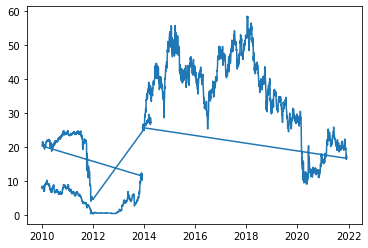

In [21]:
#closed daily
plt.plot(df_aag["datadate"], df_aag["prccd"])

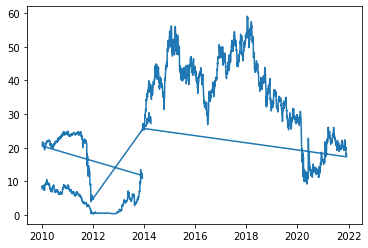

In [22]:
# high daily
plt.plot(df_aag["datadate"], df_aag["prchd"])

In [23]:
df_aag[df_aag["datadate"] == '2010-04-01 00:00:00']
# differences->tic, cusip, cshoc,cshtrd, eps,
# cusip--> Wertpapiernummer --> Ist anders und damit zwei verschiedene Stocks?

,gvkey,iid,datadate,tic,cusip,conm,div,divd,dvrated,divsppaydate,curcdd,cshoc,cshtrd,eps,prccd,prchd,prcld,prcod,prcstd,exchg,secstat,cik,conml,naics,sic,spcindcd,stko
61,1045,1,2010-04-01,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332615000.0,9292291.0,-4.99,9.03,9.29,8.93,9.20,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
1051,1045,2,2010-04-01,AAR,001765866,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,6000000.0,7887.0,NaN,21.81,21.89,21.70,21.76,3.0,11,I,6201,American Airlines Group Inc,481111,4512,605.0,0


### American Electric Power Co Inc

In [79]:
# price trend f closed daily or whole timeframe for american airlines
df_aep = df_sp[(df_sp["cusip"]=="001765106")]

In [88]:
df_aep["tic"]

,gvkey,iid,datadate,tic,cusip,conm,div,divd,dvrated,divsppaydate,curcdd,cshoc,cshtrd,eps,prccd,prchd,prcld,prcod,prcstd,exchg,secstat,cik,conml,naics,sic,spcindcd,stko
0,1045,1,2010-01-04,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,17441530.0,-4.98,7.72,7.79,7.45,7.730,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
1,1045,1,2010-01-05,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,24044700.0,-4.98,8.36,8.42,7.68,7.680,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
2,1045,1,2010-01-06,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,15770140.0,-4.98,8.11,8.31,8.01,8.110,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
3,1045,1,2010-01-07,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,17663110.0,-4.98,8.25,8.50,8.05,8.050,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
4,1045,1,2010-01-08,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,332456000.0,12413430.0,-4.98,8.11,8.42,7.97,8.340,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1045,1,2013-12-02,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,335598000.0,14339810.0,1.28,11.66,12.10,11.65,12.045,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
986,1045,1,2013-12-03,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,335598000.0,20516480.0,1.28,10.87,11.53,10.44,11.520,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
987,1045,1,2013-12-04,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,335598000.0,15000270.0,1.28,10.17,10.82,10.11,10.715,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0
988,1045,1,2013-12-05,AAMRQ,001765106,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,335598000.0,37369330.0,1.28,10.60,10.80,9.46,10.350,3.0,19,I,6201,American Airlines Group Inc,481111,4512,605.0,0


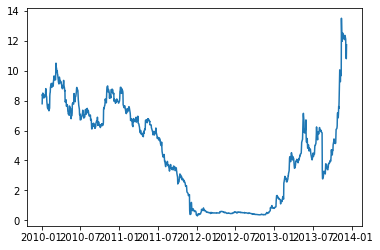

In [81]:
plt.plot(df_aep["datadate"], df_aep["prchd"])

In [82]:
df_aep["datadate"].max()

Timestamp('2013-12-06 00:00:00')

### Test ob Tic aal vernünftiges liefert

In [92]:
df_aag=df_aag[df_aag["tic"]=="AAL"]
df_aag

,gvkey,iid,datadate,tic,cusip,conm,div,divd,dvrated,divsppaydate,curcdd,cshoc,cshtrd,eps,prccd,prchd,prcld,prcod,prcstd,exchg,secstat,cik,conml,naics,sic,spcindcd,stko
1496,1045,4,2013-12-09,AAL,02376R102,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,219297000.0,43167060.0,NaN,24.60,25.44,23.4501,23.95,3.0,14,A,6201,American Airlines Group Inc,481111,4512,605.0,0
1497,1045,4,2013-12-10,AAL,02376R102,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,219297000.0,18648140.0,NaN,24.88,25.17,24.4100,24.54,3.0,14,A,6201,American Airlines Group Inc,481111,4512,605.0,0
1498,1045,4,2013-12-11,AAL,02376R102,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,219297000.0,38584270.0,NaN,25.99,27.20,25.3700,25.44,3.0,14,A,6201,American Airlines Group Inc,481111,4512,605.0,0
1499,1045,4,2013-12-12,AAL,02376R102,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,219297000.0,19977100.0,1.28,25.45,26.71,25.4500,26.20,3.0,14,A,6201,American Airlines Group Inc,481111,4512,605.0,0
1500,1045,4,2013-12-13,AAL,02376R102,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,219297000.0,12189890.0,1.28,26.23,26.30,25.5201,25.61,3.0,14,A,6201,American Airlines Group Inc,481111,4512,605.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3503,1045,4,2021-11-29,AAL,02376R102,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,647515000.0,42706490.0,-5.25,17.74,18.26,17.4200,18.15,3.0,14,A,6201,American Airlines Group Inc,481111,4512,605.0,0
3504,1045,4,2021-11-30,AAL,02376R102,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,647515000.0,49651400.0,-5.25,17.69,17.74,16.9200,17.44,3.0,14,A,6201,American Airlines Group Inc,481111,4512,605.0,0
3505,1045,4,2021-12-01,AAL,02376R102,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,647515000.0,81917470.0,-5.25,16.28,18.24,16.2600,17.94,3.0,14,A,6201,American Airlines Group Inc,481111,4512,605.0,0
3506,1045,4,2021-12-02,AAL,02376R102,AMERICAN AIRLINES GROUP INC,NaN,NaN,NaN,NaN,USD,647515000.0,58399490.0,-5.25,17.42,17.44,16.1500,16.49,3.0,14,A,6201,American Airlines Group Inc,481111,4512,605.0,0


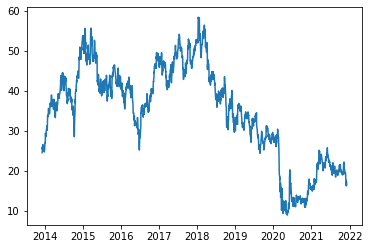

In [93]:
plt.plot(df_aag["datadate"], df_aag["prccd"])

In [76]:
df_bayer = pd.read_csv("../data/BAYN.DE.csv")

In [78]:
df_bayer.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [84]:
df_bayer["Date"] = pd.to_datetime(df_bayer["Date"].astype(str))

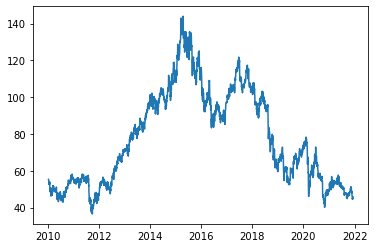

In [87]:
plt.plot(df_bayer["Date"], df_bayer["Open"])